# Eigenfaces for facial recognition

This notebook is an additional material to understand the use of PCA and more particularly eigenvectors in computer vision.

In computer vision and especially facial recognition PCA is quite useful for data visualization.

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np

In [2]:
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

In [18]:
print('Number of samples in dataset : ', X.shape[0])
print('Number of parameters in dataset : ', X.shape[1])

Number of samples in dataset :  1140
Number of parameters in dataset :  2914


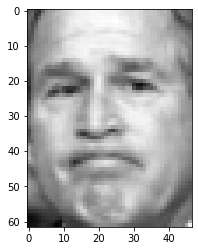

In [10]:
plt.imshow(X[0].reshape(h, w), cmap='gray')

In [117]:
# PCA
M = np.mean(X, 0) # compute the mean
C = X - M # subtract the mean (along columns)
U, S, V = np.linalg.svd(C)

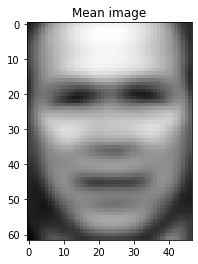

In [109]:
plt.title('Mean image')
plt.imshow(M.reshape(h, w), cmap='gray')

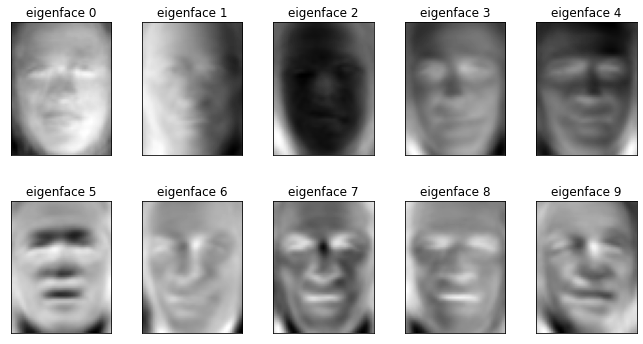

In [111]:
n_components = 10
n_col = 5
n_row = 2
titles = ['eigenface ' + str(i) for i in range(n_components)]

# Plotting 10 first eigenfaces
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(V[:n_components].shape[0]):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(V[:n_components][i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

Now we thus have a base of orthogonal eigenvectors that can be reshaped into the original image shape. These reshaped eigenvectors are calles "eigenfaces".

This base of eigenvectors lets us represent any sample image as a decomposition of these eigenfaces providing us a way to recognize faces that are "the most similar" in our dataset to the input sample image.

This similarity can be easily computed by calculating the dot product of the flattened input sample and any of the eigenface.

# Reconstructing a face using a base of eigenfaces

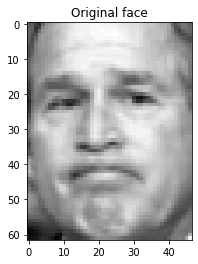

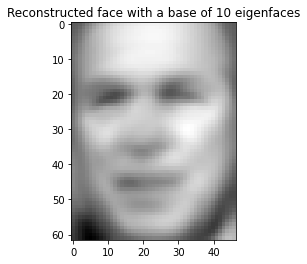

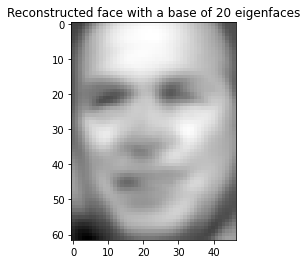

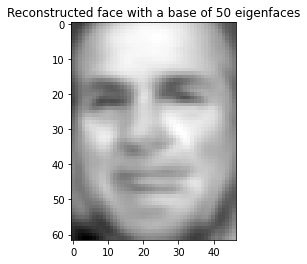

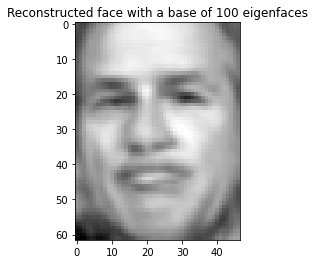

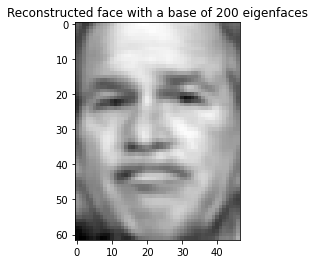

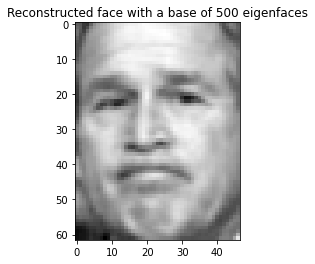

In [143]:
input_face = X[0] - M
plt.title('Original face')
plt.imshow(X[0].reshape(h, w), cmap='gray')
plt.show()
for k in [10, 20, 50, 100, 200, 500]:
    recons_face = M + V[:k, :].T @ V[:k, :] @ input_face
    plt.title('Reconstructed face with a base of %s eigenfaces' % k)
    plt.imshow(recons_face.reshape(h, w), cmap='gray')
    plt.show()